# Part-1: Binary Classification

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

1.1 Data Munging

1.1.1 Read the training and testing data. Print the number of features in the dataset.

In [2]:
#Reading training data
train_data = pd.read_csv('train_wbcd.csv')
train_data.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [3]:
#Reading test data
test_data = pd.read_csv('test_wbcd.csv')
test_data.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
1,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
2,8810528,B,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,13.300,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
3,905978,B,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,...,10.850,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
4,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.53810,0.07879,0.3322,0.14860


In [4]:
#Printing the number of features in training and test dataset
print("Number of features in training dataset excluding Patient ID and Diagnosis = ",len(list(train_data))-2)
print("List of features:\n",list(train_data))

print("\nNumber of features in test dataset excluding Patient ID and Diagnosis= ",len(list(test_data))-2)
print("List of features:\n",list(test_data))

Number of features in training dataset excluding Patient ID and Diagnosis =  30
List of features:
 ['Patient_ID', 'Diagnosis', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30']

Number of features in test dataset excluding Patient ID and Diagnosis=  30
List of features:
 ['Patient_ID', 'Diagnosis', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30']


1.1.2 Printing frequency of each levels in factor variable Diagnosis (Data Label)

In [5]:
# Total Number of 0's(or "B's") and 1's(or "M's") in training and test dataset
trDataClassDist = train_data['Diagnosis'].value_counts()
print('Diagnosis Class Distribution in training data: \n', "B =", trDataClassDist['B'], "\n M =", trDataClassDist['M'])

tsDataClassDist = test_data['Diagnosis'].value_counts()
print('Diagnosis Class Distribution in test data: \n', "B =", tsDataClassDist['B'], "\n M =", tsDataClassDist['M'])

print('Count of class B is greater than class M in training and test dataset. Thus, class distribution is unbalanced.')

Diagnosis Class Distribution in training data: 
 B = 58 
 M = 42
Diagnosis Class Distribution in test data: 
 B = 14 
 M = 6
Count of class B is greater than class M in training and test dataset. Thus, class distribution is unbalanced.


1.1.3 Printing the number of features with missing entries

In [6]:
#Missing entries i.e. value is zero for training data
missingValues = 0
for column in train_data:
    trZeroValues = (train_data[column] == 0).astype(int).sum(axis=0)
    if trZeroValues > 0:
        missingValues += 1
print('Number of features with zero in cells for training data =',missingValues)
print('Features with zero in cells for training data =',train_data.columns[(train_data ==0).astype(int).any()].tolist())

#Blank values for training data
blankValues = 0
for feature in list(train_data):
    trBlankEntries = train_data[feature].isnull().sum()
    if trBlankEntries > 0:
        blankValues += 1
print('\nNumber of features with empty cells for training data =',blankValues)
print('Features with empty cells for training data =',train_data.columns[train_data.isna().any()].tolist())


Number of features with zero in cells for training data = 6
Features with zero in cells for training data = ['f7', 'f8', 'f17', 'f18', 'f27', 'f28']

Number of features with empty cells for training data = 1
Features with empty cells for training data = ['f21']


In [7]:
#Missing entries i.e. value is zero for test data
missingValues = 0
for column in test_data:
    trZeroValues = (test_data[column] == 0).astype(int).sum(axis=0)
    if trZeroValues > 0:
        missingValues += 1
print('Number of features with zero in cells for test data =',missingValues)
print('Features with zero in cells for test data =',test_data.columns[(test_data ==0).astype(int).any()].tolist())

#Blank values for test data
blankValues = 0
for feature in list(test_data):
    trBlankEntries = test_data[feature].isnull().sum()
    if trBlankEntries > 0:
        blankValues += 1
print('\nNumber of features with empty cells for test data =',blankValues)
print('Features with empty cells for test data =',test_data.columns[test_data.isna().any()].tolist())

Number of features with zero in cells for test data = 6
Features with zero in cells for test data = ['f7', 'f8', 'f17', 'f18', 'f27', 'f28']

Number of features with empty cells for test data = 1
Features with empty cells for test data = ['f21']


1.1.4 Filling the missing values (zeros and blank values)

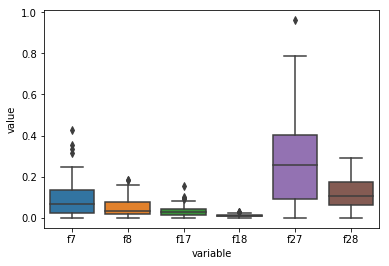

Except f28 all other variables having missing values has outliers in training data


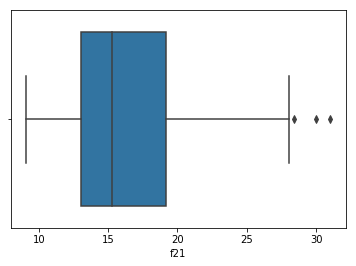

In [8]:
#Boxplot for features 'f7', 'f8', 'f17', 'f18', 'f21', 'f27', 'f28'
df = pd.DataFrame(data = train_data, columns = ['f7', 'f8', 'f17', 'f18', 'f27', 'f28'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

sns.boxplot(train_data['f21'])

print("Except f28 all other variables having missing values has outliers in training data")


In [9]:
print("f7,f8,f17,f18,f21,f27,f28 has postive skewness i.e. mean > median. Thus missing values are replaced with median.")
train_data.skew(axis = 0)

f7,f8,f17,f18,f21,f27,f28 has postive skewness i.e. mean > median. Thus missing values are replaced with median.


Patient_ID    2.486067
f1            0.862007
f2            0.520220
f3            0.904635
f4            1.343160
f5            0.373314
f6            1.288537
f7            1.478021
f8            1.175055
f9            0.404658
f10           0.977140
f11           1.680282
f12           2.214221
f13           2.126517
f14           1.848503
f15           1.159193
f16           1.604270
f17           1.749402
f18           0.589357
f19           1.555733
f20           1.618950
f21           0.901131
f22           0.295764
f23           0.962176
f24           1.403095
f25          -0.072388
f26           0.941729
f27           0.647272
f28           0.432164
f29           0.709373
f30           0.682661
dtype: float64

In [10]:
#Deleting missing values (zeros) to create blank cells (NaN)
train_data1 = train_data.replace(0, np.nan)
#Replacing blank values (NaN) with median of respective column from original data
train_data1 = train_data1.fillna(train_data.median())
#Checking missing values after replacing it with median of respective column
blankValues = 0
for feature in list(train_data1):
    trBlankEntries = train_data1[feature].isnull().sum()
    if trBlankEntries > 0:
        blankValues += 1
print('Number of features with empty cells in training data =',blankValues)
print('\nFeatures with empty cells in training data =',train_data1.columns[train_data1.isna().any()].tolist())

Number of features with empty cells in training data = 0

Features with empty cells in training data = []


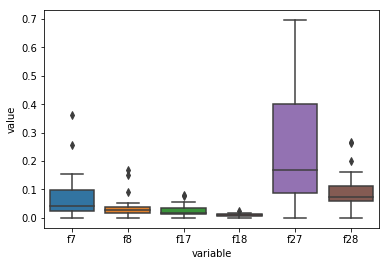

Except f27 all other variables having missing values has outliers in test data


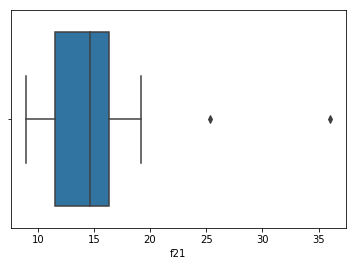

In [11]:
#Boxplot for features 'f7', 'f8', 'f17', 'f18', 'f21', 'f27', 'f28'
df = pd.DataFrame(data = test_data, columns = ['f7', 'f8', 'f17', 'f18', 'f27', 'f28'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

sns.boxplot(test_data['f21'])

print("Except f27 all other variables having missing values has outliers in test data")


In [12]:
print("f7,f8,f17,f18,f21,f27,f28 has postive skewness i.e. mean > median. Thus missing values are replaced with median.")
test_data.skew(axis = 0)

f7,f8,f17,f18,f21,f27,f28 has postive skewness i.e. mean > median. Thus missing values are replaced with median.


Patient_ID    2.825500
f1            1.882116
f2            0.356843
f3            2.019051
f4            3.048938
f5            0.368085
f6            0.617311
f7            2.002258
f8            2.090563
f9            0.417575
f10           1.146908
f11           3.863069
f12           1.013736
f13           3.961494
f14           4.340611
f15           1.499950
f16           2.003514
f17           1.204958
f18           1.171004
f19           2.571861
f20           2.715592
f21           2.075404
f22           0.089751
f23           2.187964
f24           3.300956
f25           1.292372
f26           0.704293
f27           0.847284
f28           1.354438
f29           1.311837
f30           1.553813
dtype: float64

In [13]:
#Deleting missing values (zeros) to create blank cells (NaN)
test_data1 = test_data.replace(0, np.nan)
#Replacing blank values (NaN) with median of respective coluns from original data
test_data1 = test_data1.fillna(test_data.median())
#Checking missing values after replacing it with median of respective column
blankValues = 0
for feature in list(test_data1):
    trBlankEntries = test_data1[feature].isnull().sum()
    if trBlankEntries > 0:
        blankValues += 1
print('Number of features with empty cells in test data =',blankValues)
print('\nFeatures with empty cells in test data =',test_data1.columns[test_data1.isna().any()].tolist())

Number of features with empty cells in test data = 0

Features with empty cells in test data = []


1.1.5 Normalizing the training and test data

In [14]:
#Converting data labels of Diagnosis to numbers where B = 0 and M = 1
train_data1 = train_data1.replace({'Diagnosis': {"B": 0, "M": 1}})
test_data1 = test_data1.replace({'Diagnosis': {"B": 0, "M": 1}})

#Dividing data labels and and feature variables for trainig and test data
train_features = train_data1.iloc[:,2:32]
train_label = train_data1.iloc[:,1]
test_features = test_data1.iloc[:,2:32]
test_label = test_data1.iloc[:,1]

#Normalizing training and test data
trainNorm = pd.DataFrame(scale(train_features),columns = list(train_features))
testNorm = pd.DataFrame(scale(test_features),columns = list(test_features))

1.2 Logistic Regression

In [15]:
lambda_val = 0.1
#Initialize the Logitic regression model with l1 penalty
L1_model = LogisticRegression(C=1/lambda_val, penalty='l1',random_state = 1)

#Fitting and predicting the model
L1_model.fit(trainNorm, train_label)
L1_Y_Predict = L1_model.predict(testNorm)

# Accuracy measures
L1_model_acc = accuracy_score(L1_Y_Predict, test_label)
L1_precision= precision_score(L1_Y_Predict, test_label)
L1_recall = recall_score(L1_Y_Predict, test_label)
L1_f1_score = f1_score(L1_Y_Predict, test_label)
L1_con_mat = confusion_matrix(L1_Y_Predict, test_label)
L1_cl_report = classification_report(L1_Y_Predict, test_label)

print("Model Accuracy is: {}".format(L1_model_acc))
print("Precision score is:{}".format(L1_precision))
print("Recall score is:{}".format(L1_recall))
print("f1 score is:{}".format(L1_f1_score))
print("Confusion Matrix is:{}".format(L1_con_mat))
print("Model Coeff: {}".format(np.append(L1_model.intercept_, L1_model.coef_)))

Model Accuracy is: 0.9
Precision score is:0.8333333333333334
Recall score is:0.8333333333333334
f1 score is:0.8333333333333334
Confusion Matrix is:[[13  1]
 [ 1  5]]
Model Coeff: [0.         0.         0.14262981 0.02830353 1.52680979 0.
 0.         0.33460128 0.04050406 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         3.8073722  3.74711854 4.67913467
 0.89818054 2.34886989 0.         0.         0.         0.19287377
 1.0486976 ]


In [16]:
lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
L2_model = LogisticRegression(C=1/lambda_val, penalty='l2',random_state = 2)

#Fitting and predicting the model
L2_model.fit(trainNorm, train_label)
L2_Y_Predict = L2_model.predict(testNorm)

#Accuracy measures
L2_model_acc = accuracy_score(L2_Y_Predict, test_label)
L2_precision= precision_score(L2_Y_Predict, test_label)
L2_recall = recall_score(L2_Y_Predict, test_label)
L2_f1_score = f1_score(L2_Y_Predict, test_label)
L2_con_mat = confusion_matrix(L2_Y_Predict, test_label)
L2_cl_report = classification_report(L2_Y_Predict, test_label)

print("Model Accuracy is: {}".format(L2_model_acc))
print("Precision score is:{}".format(L2_precision))
print("Recall score is:{}".format(L2_recall))
print("f1 score is:{}".format(L2_f1_score))
print("Confusion Matrix is:{}".format(L2_con_mat))
print("Model Coeff: {}".format(np.append(L2_model.intercept_, L2_model.coef_)))

Model Accuracy is: 0.9
Precision score is:0.8333333333333334
Recall score is:0.8333333333333334
f1 score is:0.8333333333333334
Confusion Matrix is:[[13  1]
 [ 1  5]]
Model Coeff: [-0.04675486  1.0450016   1.25767251  1.0448138   1.02983774 -0.17400746
  0.01180993  0.78447463  0.8880487   0.21862921 -1.05654898  0.5215903
 -0.11979931  0.57387347  0.65654834  0.52577959 -0.36190099 -0.37326692
 -0.24761879 -0.93846975  0.16709207  1.1488869   1.95597449  1.15817198
  1.08238238  1.28950083  0.43137891  0.49243932  0.65527148  1.03554896
  1.05115913]


1.3 Choosing the best hyper-parameter

A - For L1 model

In [17]:
#Joining normalized features and original data label before random splitting
NormData = trainNorm.join(train_label)
#Predictors and Labels
predictors = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12','f13', 'f14', 'f15', 'f16', 'f17', 
              'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24','f25', 'f26', 'f27', 'f28', 'f29', 'f30']
label = ['Diagnosis']
#Accruacry method to be used is Accuracy score
fID = 219021675%3
print(fID)

#Defining iterative Logistic regression model
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):
    model_acc     = 0
    model_weights = np.zeros([1,31])
   
    for i in range(0,trials):
        train,val = train_test_split(data, test_size=0.3)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
        lr.fit(train[predictors], train[label].values.ravel())
        y_predict = lr.predict(val[predictors])
        model_acc += accuracy_score(y_predict, val[label])
        model_weights = np.append(lr.intercept_, lr.coef_)
    
    model_acc /= trials
    model_weights /= trials
    return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

#Alpha values for l1
alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]

#Empty array for accuracy for each L1 alpha
l1_acc = np.zeros(len(alpha_vals))
index = 0
#Running iterative model
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(10,NormData,predictors, label, 'l1', np.float(l))
   index += 1

avg_performance = sum(l1_acc)/len(l1_acc)

print("Acc: {}".format(l1_acc))
print("Average Validation Performance =", np.round(avg_performance,decimals=2))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
max_acc_l1 = max(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))
print("Maximum validation performance: {}".format(max_acc_l1))

0
Acc: [1.   0.99 0.97 0.95 0.61 0.56 0.62 0.56 0.56 0.58 0.59]
Average Validation Performance = 0.73
Best Alpha: 0.1
Maximum validation performance: 1.0


B- For L2 model

In [18]:
#Lambda values for l2
lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]

#Empty array for accuracy for each L2 lambda
l2_acc = np.zeros(len(lambda_vals))
index = 0
#Running iterative model
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(10,NormData,predictors, label, 'l2', np.float(l))
   index += 1

avg_performance = sum(l2_acc)/len(l2_acc)

print("Acc: {}".format(l2_acc))
print("Average Validation Performance =", np.round(avg_performance,decimals=2))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
max_acc_l2 = max(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))
print("Maximum validation performance: {}".format(max_acc_l2))

Acc: [0.99 0.99 0.99 1.   0.99 1.   0.99 0.99 0.97 0.95]
Average Validation Performance = 0.99
Best Lambda: 0.03
Maximum validation performance: 1.0


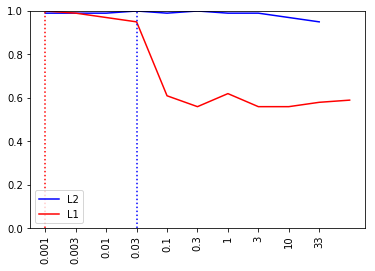

For L1, as penalty factor increases, accuracy reduces, L2 remains consistent as factor increases.


In [19]:
#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(alpha_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

print("For L1, as penalty factor increases, accuracy reduces, L2 remains consistent as factor increases.")

C- Using best alpha and lambda parameter to re-train final L1 and L2 regularized model

In [20]:
alpha_val1 = best_alpha
#Initialize the Logitic regression model with l1 penalty
L1_model1 = LogisticRegression(C=1/alpha_val1, penalty='l1')

#Fitting the models
L1_model1.fit(trainNorm, train_label)
L1_Y_Predict1 = L1_model1.predict(testNorm)

#Accuracy measures
L1_model_acc1 = accuracy_score(L1_Y_Predict1, test_label)
L1_precision1= precision_score(L1_Y_Predict1, test_label)
L1_con_mat1 = confusion_matrix(L1_Y_Predict1, test_label)
coefficients = L1_model1.coef_
coefficients = pd.DataFrame(coefficients).T
coefficients = coefficients.nlargest(5, 0)

print("Model Accuracy is: {}".format(L1_model_acc1))
print("\nPrecision score is:{}".format(L1_precision1))
print("\nConfusion Matrix is:{}".format(L1_con_mat1))
print("\nTop 5 features in descending order of feature weights: \n",coefficients)

Model Accuracy is: 0.9

Precision score is:0.8333333333333334

Confusion Matrix is:[[13  1]
 [ 1  5]]

Top 5 features in descending order of feature weights: 
            0
22  7.089687
21  3.905911
24  2.438248
20  2.026973
3   1.024384


In [21]:
lambda_val1 = best_lambda
#Initialize the Logitic regression model with l2 penalty
L2_model1 = LogisticRegression(C=1/lambda_val1, penalty ='l2')

#Fitting the models
L2_model1.fit(trainNorm, train_label)
L2_Y_Predict1 = L2_model1.predict(testNorm)

#Accuracy measures
L2_model_acc1 = accuracy_score(L2_Y_Predict1, test_label)
L2_precision1 = precision_score(L2_Y_Predict1, test_label)
L2_con_mat1 = confusion_matrix(L2_Y_Predict1, test_label)
coefficients = L2_model1.coef_
coefficients = pd.DataFrame(coefficients).T
coefficients = coefficients.nlargest(5, 0)

print("Model Accuracy is: {}".format(L2_model_acc1))
print("\nPrecision score is:{}".format(L2_precision1))
print("\nConfusion Matrix is:{}".format(L2_con_mat1))
print("\nTop 5 features in descending order of feature weights: \n",coefficients)

Model Accuracy is: 0.9

Precision score is:0.8333333333333334

Confusion Matrix is:[[13  1]
 [ 1  5]]

Top 5 features in descending order of feature weights: 
            0
21  2.526693
24  1.700917
1   1.548341
22  1.496175
20  1.469515


# Part-2 (Multiclass Classification):

2.1 Read and understand the data, create a default One-vs-Rest Classifier

In [22]:
#2.1.1
#Importing data
mnistdata = pd.read_csv('reduced_mnist.csv')

#Number of data points
rows,cols = mnistdata.shape
print("Number of data points are {}".format(rows))

#Total number of features
print("Total number of features excluding label column are {}".format(cols-1))

#Unique labels in data
unique_labels = sorted(mnistdata['label'].unique())
print("Unique labels in data are: {}".format(unique_labels))


Number of data points are 2520
Total number of features excluding label column are 784
Unique labels in data are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [23]:
#2.1.2 Fitting a One-vs-Rest Classifier
#Splitting data into 70% training data and 30% test data and fitting One-vs-Rest classifier logistic regression
mnisttrain,mnisttest = train_test_split(mnistdata, test_size = 0.3)
print('Training Data has {} rows and {} cols'.format(mnisttrain.shape[0], mnisttrain.shape[1]))
print('Testing Data has {} rows and {} cols'.format(mnisttest.shape[0], mnisttest.shape[1]))

#Dividin predictors and labels in training and test data
train_features = list(mnisttrain.drop('label', axis=1))
train_label = list(mnisttrain[['label']])
test_features = list(mnisttest.drop('label', axis=1))
test_label = list(mnisttest[['label']])

Training Data has 1764 rows and 785 cols
Testing Data has 756 rows and 785 cols


In [24]:
#Intializing the model
alpha = 1
model2 = LogisticRegression(C = 1/alpha, penalty = 'l1', multi_class='ovr')

#Fitting the model
model2.fit(mnisttrain[train_features],mnisttrain[train_label].values.ravel())

#Predicting the model
predict2 = model2.predict(mnisttest[test_features])

In [25]:
#Accuracy measures
model2_acc = np.round(accuracy_score(predict2, mnisttest[test_label]),decimals = 3)
model2_precision = np.round(precision_score(predict2, mnisttest[test_label], average = 'macro'),decimals = 3)
model2_recall = np.round(recall_score(predict2, mnisttest[test_label], average = 'macro'),decimals = 3)
model2_cl_report = classification_report(predict2, mnisttest[test_label])

print('Accuracy of the model is {}'.format(model2_acc))
print('Precision of the model is {}'.format(model2_precision))
print('Recall of the model is {}'.format(model2_recall))
print("Classification Report:")
print(model2_cl_report)


Accuracy of the model is 0.836
Precision of the model is 0.834
Recall of the model is 0.834
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        81
           1       0.93      0.92      0.92        83
           2       0.83      0.85      0.84        85
           3       0.73      0.79      0.76        73
           4       0.83      0.86      0.84        69
           5       0.77      0.78      0.77        72
           6       0.94      0.91      0.93        82
           7       0.92      0.94      0.93        69
           8       0.70      0.70      0.70        67
           9       0.77      0.77      0.77        75

   micro avg       0.84      0.84      0.84       756
   macro avg       0.83      0.83      0.83       756
weighted avg       0.84      0.84      0.84       756



In [26]:
#2.2 Choosing the best hyper-parameter
#Since fID is zero, I have used accuracy score is performance parameter
fID = 219021675%3
print(fID)

#Defining predictors and labels
predictors = mnisttrain.columns[1:785]
label = mnisttrain.columns[0]

#Defining iterative model
def LRmodel(trials, data, predictors, label, penalty_type, penalty_score):
    acc_val = 0
    acc_train = 0
        
    for i in range(0,trials):
        train,val = train_test_split(data, test_size=0.3)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type,multi_class='ovr')
        lr.fit(train[predictors], train[label].values.ravel())
        
        #Validation accuracy
        y_predict_val = lr.predict(val[predictors])
        acc_val += accuracy_score(y_predict_val, val[label])
        
        #Training accuracy
        y_predict_train = lr.predict(train[predictors])
        acc_train += accuracy_score(y_predict_train, train[label])
    
    acc_val /= trials
    acc_train /= trials
    return np.round(acc_val, decimals=2), np.round(acc_train,decimals=2)


0


In [27]:
#Defining alpha
alpha1 = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]

#Running iterative model
val_accuracy = []
train_accuracy = []

for l in alpha1:
    acc_train,acc_val = LRmodel(10,mnisttrain,predictors,label,'l1',np.float(l))
    val_accuracy.append(acc_val)
    train_accuracy.append(acc_train)

acc = pd.DataFrame(columns = ["Hyperparameter", "Validation Accuracy", "Training Accuracy"])
acc['Hyperparameter'] = alpha1
acc['Validation Accuracy'] = val_accuracy
acc['Training Accuracy'] = train_accuracy
acc


,Hyperparameter,Validation Accuracy,Training Accuracy
0,0.1,1.00,0.83
1,1.0,1.00,0.84
2,3.0,1.00,0.83
3,10.0,1.00,0.83
4,33.0,1.00,0.84
5,100.0,1.00,0.84
6,333.0,0.96,0.86
7,1000.0,0.92,0.86
8,3333.0,0.85,0.80
9,10000.0,0.75,0.70


Best alpha for Validation: 0.1
Best alpha for Training: 333


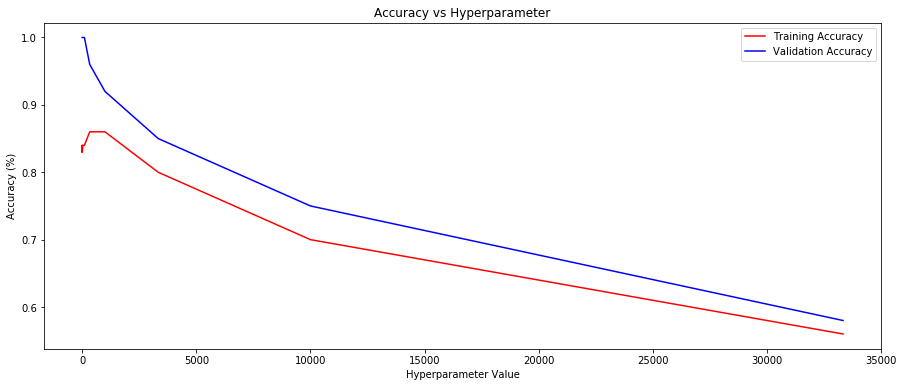

In [28]:
max_index_val = np.argmax(val_accuracy)
best_alpha_val= alpha1[max_index_val]
print('Best alpha for Validation: {}'.format(best_alpha_val))

max_index_train = np.argmax(train_accuracy)
best_alpha_train= alpha1[max_index_train]
print('Best alpha for Training: {}'.format(best_alpha_train))

# plot graph
plt.rcParams["figure.figsize"] = (15,6)
fig = plt.figure()
ax = plt.axes()

plt.title("Accuracy vs Hyperparameter")
plt.xlabel("Hyperparameter Value")
plt.ylabel("Accuracy (%)");

plt.plot(acc['Hyperparameter'], acc['Training Accuracy'], color='red', label='Training Accuracy');
plt.plot(acc['Hyperparameter'], acc['Validation Accuracy'], color='blue', label='Validation Accuracy');
plt.legend()
plt.show()

Overfitting occurs when models learns more about the training dataset,thus giving high accuracy than validation dataset. But, in this case, accuracy on training dataset is lower than validation dataset indicating underfit. i.e. there is still scope for model to learn. This may be due to random splitting or validation dataset size should be increased.In this case, best hyperparameter is 33 where accuracy for validation dataset is 1 and 0.85 for training dataset. Beyond hyperparameter 1000.0 model becomes underfit as training and validation dataset accuracy decreases significantly. However, 100% accuracy on validation set seems to be unrealistic and I crosschecked my multiple times but couldn't figure out any mistake. Appreciate if I could get feedback specifically on this part.

In [29]:
#2.2.2 Bulding final model
best_alpha = 33
#Initializing the model
model3 = LogisticRegression(C=1/best_alpha, penalty='l1', multi_class='ovr')
#Fitting the model
model3.fit(mnisttrain[predictors].values,mnisttrain[label].values.ravel())
#Predicting the model
model3_predict = model3.predict(mnisttest[predictors])

In [30]:
#Accuracy measures
model3_acc = np.round(accuracy_score(model3_predict,mnisttest[label]),decimals = 3)
model3_pre = np.round(precision_score(model3_predict,mnisttest[label],average = None),decimals = 3)
model3_rec = np.round(recall_score(model3_predict,mnisttest[label],average = None),decimals = 3)
model3_con_mat = confusion_matrix(model3_predict,mnisttest[label])
model3_cl_report = classification_report(model3_predict,mnisttest[label])

print("Accuracy of the model is: {}". format(model3_acc))
print("Precison for each class in the model is: {}". format(model3_pre))
print("Recall for each class in the model is: {}". format(model3_rec))
print("Confusion matrix:")
print(model3_con_mat)

acc_class = pd.DataFrame(columns = ["Label", "Accuracy", "Precision", "Recall"])
acc_class['Label'] = [0,1,2,3,4,5,6,7,8,9]
acc_class['Accuracy'] = np.round(model3_con_mat.diagonal()/model3_con_mat.sum(axis = 1),decimals = 3)
acc_class['Precision'] = model3_pre
acc_class['Recall'] = model3_rec
acc_class

Accuracy of the model is: 0.841
Precison for each class in the model is: [0.93  0.939 0.828 0.759 0.859 0.767 0.925 0.901 0.731 0.76 ]
Recall for each class in the model is: [0.892 0.895 0.9   0.779 0.859 0.778 0.925 0.889 0.731 0.74 ]
Confusion matrix:
[[66  0  1  1  0  2  0  0  2  2]
 [ 1 77  0  1  1  1  0  0  5  0]
 [ 0  1 72  2  0  1  1  0  2  1]
 [ 0  0  3 60  2  3  0  1  3  5]
 [ 0  0  0  0 61  0  3  0  1  6]
 [ 1  1  0 11  0 56  1  0  1  1]
 [ 1  0  4  0  0  0 74  0  1  0]
 [ 1  0  2  0  2  0  0 64  1  2]
 [ 1  3  2  3  0  6  1  1 49  1]
 [ 0  0  3  1  5  4  0  5  2 57]]


,Label,Accuracy,Precision,Recall
0,0,0.892,0.930,0.892
1,1,0.895,0.939,0.895
2,2,0.900,0.828,0.900
3,3,0.779,0.759,0.779
4,4,0.859,0.859,0.859
5,5,0.778,0.767,0.778
6,6,0.925,0.925,0.925
7,7,0.889,0.901,0.889
8,8,0.731,0.731,0.731
9,9,0.740,0.760,0.740


2.2.3 Sign of underfitting or overfitting:
One of the reason for underfitting or overfitting is imbalanced data for each class as random sampling might get more or less data points of a certain class of data. From below table we can see that training data is imbalanced resulting low accuracy than precision. Thus, we can say that there is sign of underfitting.

In [31]:
print('Label Count: ')
print(mnisttrain['label'].value_counts())

Label Count: 
1    204
0    186
7    185
2    182
3    179
8    172
4    172
9    163
6    163
5    158
Name: label, dtype: int64
